# ONLINE SIGNATURE VERIFICATION
#### By Avi Khandelwal, 204102301


 A dynamic programming based technique for online signature verification has been implemented. The objective is to compare and align the
temporal sequence between two signature time sequences and utilize the local features derived to classify them as genuine or forgery. A metric known
as Dynamic Time Warping (DTW) for computing the similarity score between two online traces of signature data samples has been adopted. In our
approach, we have used two components in the DTW score called as average feature distortion and average feature displacement for better
separability between genuine and forged signatures.

In [ ]:
#!pip install git+https://github.com/bsxfan/PYLLR.git
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from numpy import asarray
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from scipy.special import expit as sigmoid
from numpy.linalg import norm
from pyllr.pav_rocch import PAV, ROCCH
from scipy.ndimage import minimum_filter1d
from scipy.ndimage import maximum_filter1d
#drive.mount('/content/drive')

In [ ]:
def ratio_min_to_max(a, W):
    hW = (W-1)//2 # Half window size
    arr = minimum_filter1d(a,size=W)[hW:-hW]/maximum_filter1d(a,size=W)[hW:-hW]
    arr = np.concatenate([arr,np.array([0,0,0,0])])
    return arr

def stroke_length_width_ratio(x,y,W):
  res = np.zeros(len(x)-1)
  for i in range(len(x)-W):
    res[i] = (y[i+W] - y[i])/(x[i+W]-x[i])
  return res

def time_function_extraction(train_sig,test_sig):

  # Calculating 23 Time Functions

  # training

  train_transformed_sig = np.array(train_sig)
  x_tr = train_transformed_sig[:,0] # 1
  y_tr = train_transformed_sig[:,1] # 2
  z_tr = train_transformed_sig[:,5] # 3
  theta_tr = train_transformed_sig[:,4] # 4
  x1_tr = np.diff(x_tr, n=1,axis=0) # 5
  y1_tr = np.diff(y_tr, n=1,axis=0) # 6
  t1_tr = np.diff(train_transformed_sig[:,2], n=1,axis=0)
  z1_tr = np.diff(z_tr, n=1,axis=0) # 7
  theta1_tr = np.diff(theta_tr, n=1,axis=0) # 8
  v_tr = np.sqrt((x1_tr/t1_tr)**2 + (y1_tr/t1_tr)**2) # 9
  v1_tr = np.diff(v_tr,append=0) # 10
  a_tr = v1_tr/t1_tr # 11
  a1_tr = np.diff(a_tr,append=0) # 12
  x2_tr = np.diff(x1_tr,append=0) # 13
  y2_tr = np.diff(y1_tr,append=0) # 14
  rho_tr = abs(((x1_tr**2 + y1_tr**2)**1.5)/(x1_tr*y2_tr-y1_tr*x2_tr)) # 15
  rho1_tr = np.diff(rho_tr, n=1,axis=0,append=0) # 16
  vr_tr = ratio_min_to_max(v_tr, 5) # 17
  alpha_tr = np.rad2deg(np.arctan(y1_tr/x1_tr)) # 18
  alpha1_tr = np.diff(alpha_tr,append=0) # 19
  sine_tr = np.sin(np.radians(alpha_tr)) # 20
  cosine_tr = np.cos(np.radians(alpha_tr)) # 21
  r5_tr = stroke_length_width_ratio(x_tr,y_tr,5) #22
  r7_tr = stroke_length_width_ratio(x_tr,y_tr,7) #23
  x_tr = x_tr[:-1]
  y_tr = y_tr[:-1]
  z_tr = z_tr[:-1]
  theta_tr = theta_tr[:-1]

  # testing

  test_transformed_sig = np.array(test_sig)
  x_ts = test_transformed_sig[:,0] # 1
  y_ts = test_transformed_sig[:,1] # 2
  z_ts = test_transformed_sig[:,5] # 3
  theta_ts = test_transformed_sig[:,4] # 4
  x1_ts = np.diff(x_ts, n=1,axis=0) # 5
  y1_ts = np.diff(test_transformed_sig[:,1], n=1,axis=0) # 6
  t1_ts = np.diff(test_transformed_sig[:,2], n=1,axis=0)
  z1_ts = np.diff(z_ts, n=1,axis=0) # 7
  theta1_ts = np.diff(theta_ts, n=1,axis=0) # 8
  v_ts = np.sqrt((x1_ts/t1_ts)**2 + (y1_ts/t1_ts)**2) # 9
  v1_ts = np.diff(v_ts,append=0) # 10
  a_ts = v1_ts/t1_ts # 11
  a1_ts = np.diff(a_ts,append=0) # 12
  x2_ts = np.diff(x1_ts,append=0) # 13
  y2_ts = np.diff(y1_ts,append=0) # 14
  rho_ts = abs(((x1_ts**2 + y1_ts**2)**1.5)/(x1_ts*y2_ts-y1_ts*x2_ts)) # 15
  rho1_ts = np.diff(rho_ts, n=1,axis=0,append=0) # 16
  vr_ts = ratio_min_to_max(v_ts, 5) # 17
  alpha_ts = np.rad2deg(np.arctan(y1_ts/x1_ts)) # 18
  alpha1_ts = np.diff(alpha_ts,append=0) # 19
  sine_ts = np.sin(np.radians(alpha_ts)) # 20
  cosine_ts = np.cos(np.radians(alpha_ts)) # 21
  r5_ts = stroke_length_width_ratio(x_ts,y_ts,5) #22
  r7_ts = stroke_length_width_ratio(x_ts,y_ts,7) #23
  x_ts = x_ts[:-1]  
  y_ts = y_ts[:-1]
  z_ts = z_ts[:-1]
  theta_ts = theta_ts[:-1]
 
  d_tr = {'x_tr':x_tr,'y_tr':y_tr,'z_tr':z_tr,'theta_tr':theta_tr,'x1_tr':x1_tr,'y1_tr':y1_tr,'z1_tr':z1_tr,'theta1_tr':theta1_tr,'v_tr':v_tr,'v1_tr':v1_tr,
     'a_tr':a_tr,'a1_tr':a1_tr,'x2_tr': x2_tr,'y2_tr':y2_tr,'rho_tr':rho_tr,"rho1_tr":rho1_tr,"vr_tr":vr_tr,"alpha_tr":alpha_tr,"alpha1_tr":alpha1_tr,"sine_tr":sine_tr,
     "cosine_tr":cosine_tr,"r5_tr":r5_tr,"r7_tr":r7_tr}
  d_ts = {'x_ts':x_ts,'y_ts':y_ts,'z_ts':z_ts,'theta_ts':theta_ts,'x1_ts':x1_ts,'y1_ts':y1_ts,'z1_ts':z1_ts,'theta1_ts':theta1_ts,'v_ts':v_ts,'v1_ts':v1_ts,
     'a_ts':a_ts,'a1_ts':a1_ts,'x2_ts': x2_ts,'y2_ts':y2_ts,'rho_ts':rho_ts,"rho1_ts":rho1_ts,"vr_ts":vr_ts,"alpha_ts":alpha_ts,"alpha1_ts":alpha1_ts,"sine_ts":sine_ts,
     "cosine_ts":cosine_ts,"r5_ts":r5_ts,"r7_ts":r7_ts}

  train_transformed_df = pd.DataFrame(d_tr)
  mean = np.array(train_transformed_df.mean())
  std = np.array(train_transformed_df.std())
  train_normalized_df = (train_transformed_df - mean)/std
  train_normalized_df.replace(np.inf,1,inplace=True)
  train_normalized_df.replace(-np.inf,-1,inplace=True)
  train_normalized_df.fillna(0,inplace=True)

  test_transformed_df = pd.DataFrame(d_ts)
  test_normalized_df = (test_transformed_df - mean)/std
  test_normalized_df.replace(np.inf, 1,inplace=True)
  test_normalized_df.replace(-np.inf, -1,inplace=True)
  test_normalized_df.fillna(0,inplace=True)
  
  return train_normalized_df,test_normalized_df
  

The data on reading from the notepad files has a structure as given below-

In [ ]:
train_sig = pd.read_csv("/content/drive/My Drive/DeepSignDB/test/u0001_g_0100v00.txt",skiprows=1,sep=" ",names=["X coordinate","Y coordinate","Time","Azimuth","Angle","Pressure"])

test_sig = pd.read_csv("/content/drive/My Drive/DeepSignDB/test/u0001_g_0100v10.txt",skiprows=1,sep=" ",names=["X coordinate","Y coordinate","Time","Azimuth","Angle","Pressure"])
test_sig.head(5)

,X coordinate,Y coordinate,Time,Azimuth,Angle,Pressure
0,8651,7738,0,144,61,191
1,8677,7761,10,144,61,279
2,8677,7761,20,143,62,367
3,8677,7761,30,143,62,475
4,8677,7761,40,140,62,543


From the 6 time functions already available which were X-coordinate, Y-coordinate, Time,
Azimuth, Angle and Pressure, 23 time functions have been extracted which some preprocessing. This is done to increase the dimensionality of the feature
vector at every sample point so that feature vectors corresponding to genuine and forged
signatures can become more separable.

In [ ]:
tr_df,ts_df = time_function_extraction(train_sig,test_sig)
dp,dp_base,warping_path1,l_wp = find_warping_path1(tr_df,ts_df)
tr_df.head(5)

,x_tr,y_tr,z_tr,theta_tr,x1_tr,y1_tr,z1_tr,theta1_tr,v_tr,v1_tr,a_tr,a1_tr,x2_tr,y2_tr,rho_tr,rho1_tr,vr_tr,alpha_tr,alpha1_tr,sine_tr,cosine_tr,r5_tr,r7_tr
0,-2.074026,-1.529017,-0.944692,2.431936,0.614671,-0.176737,1.811849,0.021587,-0.250273,-0.687279,-0.687279,0.380758,-1.445469,1.428383,0.0,0.0,-0.428815,-0.423167,1.743159,-0.510672,1.385233,0.0,0.0
1,-2.034017,-1.564015,-0.462820,2.431936,-0.113152,0.422125,0.222455,-2.412303,-0.621964,-0.160104,-0.160104,1.160002,0.003212,-0.215351,0.0,0.0,-0.591741,1.230732,-0.005282,1.050198,-1.311422,0.0,0.0
2,-2.034017,-1.482353,-0.403513,1.716007,-0.113152,0.332296,0.180628,-2.412303,-0.709881,1.442835,1.442835,-0.327668,1.173301,1.428383,0.0,0.0,-0.702962,1.230732,-0.584410,1.050198,-1.311422,0.0,0.0
3,-2.034017,-1.418190,-0.355326,1.000078,0.474705,0.931158,0.194571,0.021587,0.065053,0.992014,0.992014,-0.021697,0.727553,0.928116,0.0,0.0,0.164407,0.682918,-0.066052,0.830911,0.240741,0.0,0.0
4,-2.001703,-1.237368,-0.303432,1.000078,0.838617,1.320418,0.501296,0.021587,0.597312,0.963592,0.963592,0.101689,0.671834,0.928116,0.0,0.0,0.780305,0.625433,-0.025821,0.784227,0.380776,0.0,0.0


Applying DTW algorithm on test and training signature, at every cell, minimum of the costs of insertion, deletion and replacement at a sample point is added to the distance between the two signatures at the sample point, this way at the
bottom right corner of the 2D array, the minimum cost of converting one signature time sequence into the other via the 3 operations is stored. After achieving this via backtracking, the warping path can be found out.

In [ ]:
def find_warping_path1(tr_df,ts_df):

  train_transformed_sig = np.array(tr_df)
  test_transformed_sig = np.array(ts_df)

  # Dynamic Time Warping
  n,m = len(train_transformed_sig),len(test_transformed_sig)
  dp = np.zeros((n+1,m+1))
  dp_base = np.zeros((n+1,m+1))

  # Initialisation
  for j in range(1,m+1):
    dp[0,j] = dp[0,j-1] + norm(test_transformed_sig[j-1],1)
    dp_base[0,j] = norm(test_transformed_sig[j-1],1)

  for i in range(1,n+1):
    dp[i,0] = dp[i-1,0] + norm(train_transformed_sig[i-1],1)
    dp_base[i,0] = norm(train_transformed_sig[i-1],1)

  # Filling the rest of dp
  for i in range(1,n+1):
    for j in range(1,m+1):
      dp[i,j] = norm(train_transformed_sig[i-1]-test_transformed_sig[j-1],1) + np.min(np.array([dp[i-1,j],dp[i-1,j-1],dp[i,j-1]]))
      dp_base[i,j] = norm(train_transformed_sig[i-1]-test_transformed_sig[j-1],1)
  
  # Finding the warping path
  warping_path = []
  i,j = n,m
  l_wp = 0
  while i >= 0 and j >= 0:
    warping_path.append([i,j])
    min = np.min(np.array([(dp[i-1,j],dp[i-1,j-1],dp[i,j-1])]))
    if dp[i-1,j] == min:
      next_i,next_j = i-1,j
    elif dp[i-1,j-1] == min:
      next_i,next_j = i-1,j-1
    else:
      next_i,next_j = i,j-1
    l_wp += abs(next_i-i) + abs(next_j-j)
    i,j = next_i,next_j
  warping_path = warping_path[::-1]
  warping_path = np.array(warping_path)

  return dp,dp_base,warping_path,l_wp*100

In [ ]:
print(dp[:5,:5])
print()
print(dp_base[:5,:5])
print()
print(warping_path1[:5])
print()
print(l_wp)

[[  0.          29.00172443  49.79107156  67.57821099  85.42332352]
 [ 18.97500154  30.49222161  60.00180896  77.49150878  97.0940105 ]
 [ 35.14793568  52.05818714  60.28804107  86.40328358 104.87586989]
 [ 55.22683091  75.8510109   85.71408283  90.94394712 115.78715782]
 [ 67.36793629  87.43206898 104.77474845 111.63783075 116.1112309 ]]

[[ 0.         29.00172443 20.78934713 17.78713943 17.84511253]
 [18.97500154 30.49222161 31.00008453 27.70043722 29.51579951]
 [16.17293414 33.08318561 29.79581946 26.40147462 27.38436111]
 [20.07889523 40.70307522 33.65589569 30.65590605 29.38387424]
 [12.14110538 32.20523808 28.92373755 25.92374791 25.16728377]]

[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]]

9310


A modification to the traditional DTW system has been made by incorporating another
warping path score having two components called as feature distortion and displacement.
If (ai,bj) refers to the alignment of the ith sample point of training signature to jth sample
point of test signature on the warping path, then (ri,bj) refers to the new alignment we
calculated for ri sample point of training signature to bj sample point of test signature.
Corresponding to the alignment pairs (ri,bj) we will have warping path scores which will be
fused with original DTW scores to obtain the modified DTW score for classification

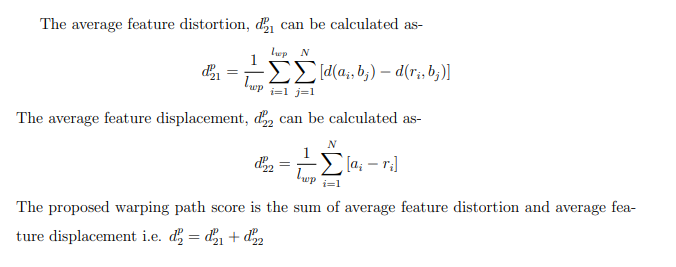

In [ ]:
def get_min(dp,b,a,w):
  n,m = len(dp),len(dp[0])
  p = n//5
  index_i,mn = a,sum(dp[a,b-w:b+w+1])
  start,stop = max(a-p,0),min(a+p,n-1)
  for i in range(start,stop+1):
    sm = sum(dp[i,max(b-w,0):min(b+w+1,m-1)])
    if sm < mn:
      index_i = i
      mn = sm
  return index_i

def find_warping_path2(dp,warping_path1,window_size):
  warping_path2 = []
  for a,b in warping_path1:
    i = get_min(dp,b,a,window_size)
    warping_path2.append([i,b])
  return np.array(warping_path2)

def visualise_warping_path(warping_path1,warping_path2):
  plt.rcParams["figure.figsize"] = (10,6)
  plt.scatter(warping_path1[:,0],warping_path1[:,1],s=10,c='b')
  plt.scatter(warping_path2[:,0],warping_path2[:,1],s=1,c='r')
  plt.title("Warping path")
  plt.xlabel("Training Signature Time Sequences")
  plt.xticks(np.arange(np.min(warping_path1[:,0]), np.max(warping_path1[:,0])+1, 40))
  plt.yticks(np.arange(np.min(warping_path1[:,1]), np.max(warping_path1[:,1])+1, 40))
  plt.ylabel("Testing Signature Time Sequences")
  plt.legend(["path1", "path2"], loc ="lower right")
  plt.grid()

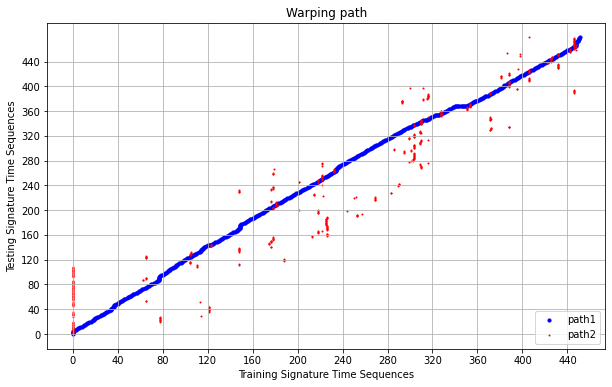

In [ ]:
warping_path2 = find_warping_path2(dp_base,warping_path1,5)
visualise_warping_path(warping_path1,warping_path2)

The blue line indicates the warping path found using backtracking in traditional DTW cost
matrix and the red line indicates the new allignments obtained from the alternate warping
path. For genuine signatures, the red line should be very near to blue, wheras for forged
signature both will be quite far apart.


In [ ]:
def get_score(warping_path1,warping_path2,dp,tr_df,l_wp):
  l = len(warping_path1)
  score_fd = 0
  score_dis = 0

  for i in range(l):
    a,b = warping_path1[i,0],warping_path1[i,1]
    c = warping_path2[i,0]
    score_fd += abs(dp[a,b] - dp[c,b])/(max(dp[:,b])*l_wp)
    score_dis += abs(a-c)/(len(tr_df)*l_wp)

  return 100*(0.4*score_fd+0.6*score_dis)


def get_eer(tar,non):
  scores = np.concatenate((tar,non)).astype(np.float32)
  labels = np.zeros_like(scores)
  labels[:len(tar)] = 1.0
  pav = PAV(scores,labels)
  rocch = ROCCH(pav)
  return rocch.EER()

def visualise_scatter(tar,non,gen,forg):
  plt.rcParams["figure.figsize"] = (12,3)

  scores = np.concatenate((tar,non)).astype(np.float32)
  labels = np.zeros_like(scores)
  labels[:len(tar)] = 1.0
  pav = PAV(scores,labels)
  rocch = ROCCH(pav)

  plt.subplot(1,2,1)
  pmiss,pfa = rocch.Pmiss_Pfa()
  plt.plot(pfa,pmiss)
  plt.plot(np.array([0,1]),np.array([0,1]))
  plt.grid()
  plt.title("DET Curve")

  plt.subplot(1,2,2)
  plt.scatter(gen[:,0],gen[:,1],s=20,c='b')
  plt.scatter(forg[:,0],forg[:,1],s=20,c='r')
  plt.title("Genuine and Forgery Test Signatures")
  plt.xlabel("Traditional DTW (Original)")
  plt.ylabel("Warping Path DTW (Modified)")
  plt.legend(["Genuine", "Forgery"], loc ="lower right")
  plt.grid()

For evaluation, EER which stands for equal error ratio is used that tells us the rate at which
false positive rate becomes equal to the false negative rate, or the rate at which 45 degree
line intersects the DET curve, lower the EER better the system is working in classifying the
signature as genuine and forgery

In [ ]:
# Genuine
d2 = get_score(warping_path1,warping_path2,dp_base,tr_df,l_wp)
d1 = dp[-1][-1]/l_wp
print(d1,d2)

0.12232525588002331 0.039569738495071546


0.1666586171134642 0.04639122940935518


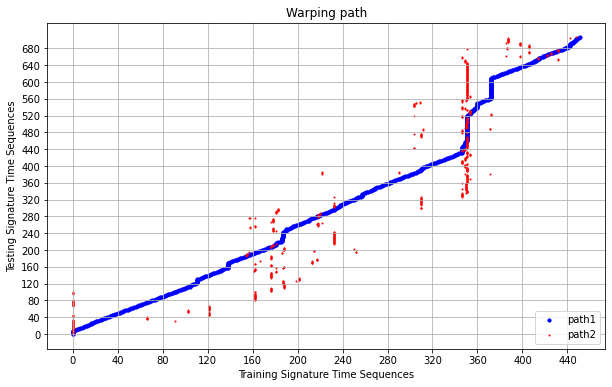

In [ ]:
# Forgery
test_sig = pd.read_csv("/content/drive/My Drive/DeepSignDB/test/u0001_s_0100f10.txt",skiprows=1,sep=" ",names=["X coordinate","Y coordinate","Time","Azimuth","Angle","Pressure"])
tr_df,ts_df = time_function_extraction(train_sig,test_sig)
dp,dp_base,warping_path1,l_wp = find_warping_path1(tr_df,ts_df)
warping_path2 = find_warping_path2(dp_base,warping_path1,5)
visualise_warping_path(warping_path1,warping_path2)
d2 = get_score(warping_path1,warping_path2,dp_base,tr_df,l_wp)
d1 = dp[-1][-1]/l_wp
print(d1,d2)

In [ ]:
def dtw_genuine(user):
  count = str(100+user-1)
  user  = "0" * (4-len(str(user))) + str(user)

  # DTW scores for 20 genuine test signatures against 5 genuine training signatures
  
  dtw = np.zeros((20,2))
  samples_training = np.arange(5)
  samples_testing = np.arange(5,25)
  train_sig = []

  for j,i in enumerate(samples_training):
      index_tr = str(i)
      if len(index_tr) == 1:
        index_tr = "0" + index_tr
      sig = pd.read_csv("/content/drive/My Drive/DeepSignDB/test/u"+user+"_g_0"+count+"v"+index_tr+".txt",skiprows=1,sep=" ",names=["X coordinate","Y coordinate","Time","Azimuth","Angle","Pressure"])
      train_sig.append(sig)

  for k,l in enumerate(samples_testing):
    index_ts = str(l)
    if len(index_ts) == 1:
      index_ts = "0" + index_ts
    test_sig = pd.read_csv("/content/drive/My Drive/DeepSignDB/test/u"+user+"_g_0"+count+"v"+index_ts+".txt",skiprows=1,sep=" ",names=["X coordinate","Y coordinate","Time","Azimuth","Angle","Pressure"])
    dtw_scores_ts = np.zeros((5,2))
    for i in range(5):
      tr_df,ts_df = time_function_extraction(train_sig[i],test_sig)
      dp,dp_base,warping_path1,l_wp = find_warping_path1(tr_df,ts_df)
      warping_path2 = find_warping_path2(dp_base,warping_path1,5)
      dtw_scores_ts[i,0],dtw_scores_ts[i,1] = dp[-1][-1]/l_wp,get_score(warping_path1,warping_path2,dp_base,tr_df,l_wp)
      
    dtw[k,0] = np.mean(dtw_scores_ts[:,0])
    dtw[k,1] = np.mean(dtw_scores_ts[:,1])

  return dtw

In [ ]:
def dtw_forgery(user):
  count = str(100+user-1)
  user  = "0" * (4-len(str(user))) + str(user)

  # DTW scores for 25 forgery test signatures against 5 genuine training signatures
  
  dtw = np.zeros((25,2))
  samples_training = np.arange(5)
  samples_testing = np.arange(25)
  train_sig = []

  for j,i in enumerate(samples_training):
      index_tr = str(i)
      if len(index_tr) == 1:
        index_tr = "0" + index_tr
      sig = pd.read_csv("/content/drive/My Drive/DeepSignDB/test/u"+user+"_g_0"+count+"v"+index_tr+".txt",skiprows=1,sep=" ",names=["X coordinate","Y coordinate","Time","Azimuth","Angle","Pressure"])
      train_sig.append(sig)

  for k,l in enumerate(samples_testing):
    index_ts = str(l)
    if len(index_ts) == 1:
      index_ts = "0" + index_ts
    test_sig = pd.read_csv("/content/drive/My Drive/DeepSignDB/test/u"+user+"_s_0"+count+"f"+index_ts+".txt",skiprows=1,sep=" ",names=["X coordinate","Y coordinate","Time","Azimuth","Angle","Pressure"])
    dtw_scores_ts = np.zeros((5,2))
    for i in range(5):
      tr_df,ts_df = time_function_extraction(train_sig[i],test_sig)
      dp,dp_base,warping_path1,l_wp = find_warping_path1(tr_df,ts_df)
      warping_path2 = find_warping_path2(dp_base,warping_path1,5)
      dtw_scores_ts[i,0],dtw_scores_ts[i,1] = dp[-1][-1]/l_wp,get_score(warping_path1,warping_path2,dp_base,tr_df,l_wp)
     
    dtw[k,0] = np.mean(dtw_scores_ts[:,0])
    dtw[k,1] = np.mean(dtw_scores_ts[:,1])

  return dtw

0it [00:00, ?it/s]

0it [00:00, ?it/s]

EER: 0.2818


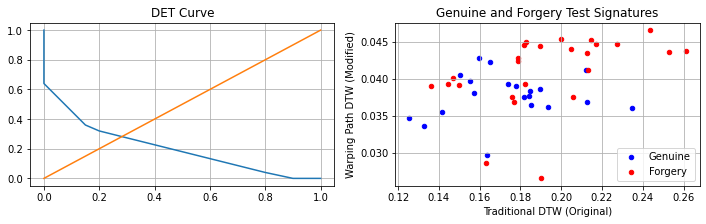

In [ ]:
dtw_gen = dtw_genuine(1)
dtw_forg = dtw_forgery(1)
gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
print("EER:",round(get_eer(forg,gen),4))
visualise_scatter(forg,gen,dtw_gen,dtw_forg)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

EER: 0.0476


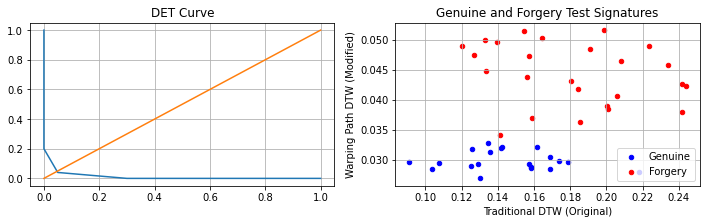

In [ ]:
dtw_gen = dtw_genuine(2)
dtw_forg = dtw_forgery(2)
gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
print("EER:",round(get_eer(forg,gen),4))
visualise_scatter(forg,gen,dtw_gen,dtw_forg)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

EER: 0.1692


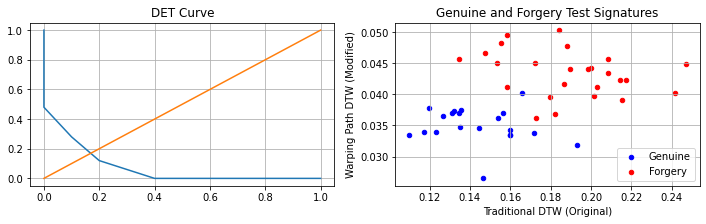

In [ ]:
dtw_gen = dtw_genuine(3)
dtw_forg = dtw_forgery(3)
gen,forg = np.average(dtw_gen, axis=1, weights=[1./4, 3./4]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
print("EER:",round(get_eer(forg,gen),4))
visualise_scatter(forg,gen,dtw_gen,dtw_forg)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

EER: 0.241


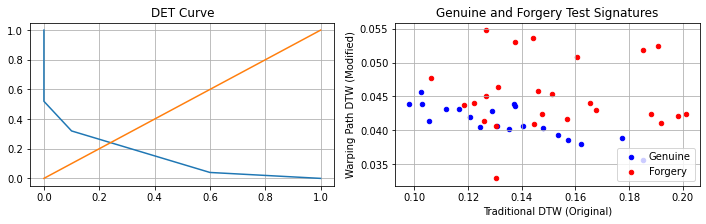

In [ ]:
dtw_gen = dtw_genuine(4)
dtw_forg = dtw_forgery(4)
gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
print("EER:",round(get_eer(forg,gen),4))
visualise_scatter(forg,gen,dtw_gen,dtw_forg)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

EER: 0.2476


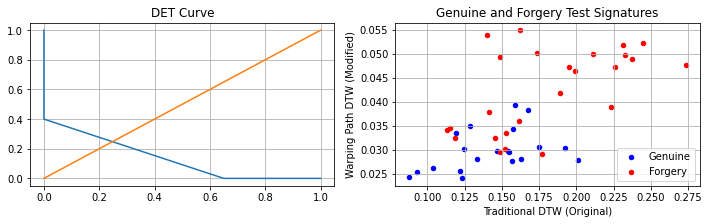

In [ ]:
dtw_gen = dtw_genuine(5)
dtw_forg = dtw_forgery(5)
gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
print("EER:",round(get_eer(forg,gen),4))
visualise_scatter(forg,gen,dtw_gen,dtw_forg)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

EER: 0.1


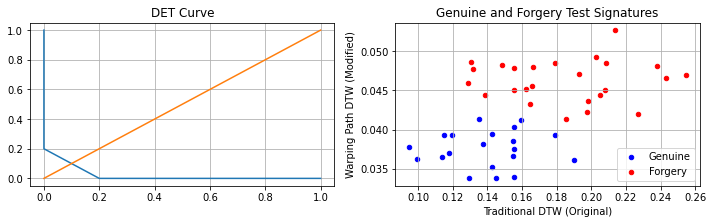

In [ ]:
dtw_gen = dtw_genuine(6)
dtw_forg = dtw_forgery(6)
gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
print("EER:",round(get_eer(forg,gen),4))
visualise_scatter(forg,gen,dtw_gen,dtw_forg)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

EER: 0.1111


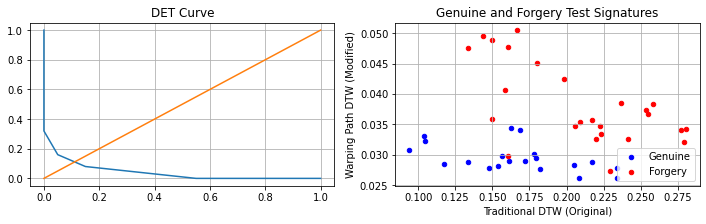

In [ ]:
dtw_gen = dtw_genuine(7)
dtw_forg = dtw_forgery(7)
gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
print("EER:",round(get_eer(forg,gen),4))
visualise_scatter(forg,gen,dtw_gen,dtw_forg)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

EER: 0.2444


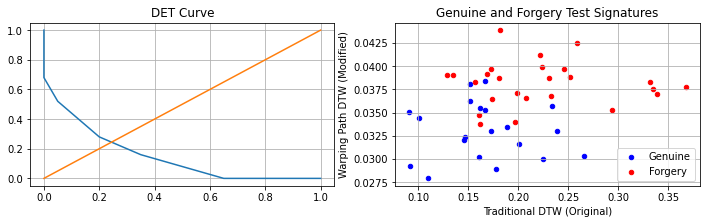

In [ ]:
dtw_gen = dtw_genuine(8)
dtw_forg = dtw_forgery(8)
gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
print("EER:",round(get_eer(forg,gen),4))
visualise_scatter(forg,gen,dtw_gen,dtw_forg)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

EER: 0.1111


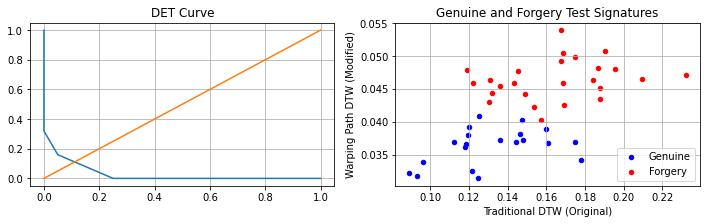

In [ ]:
dtw_gen = dtw_genuine(9)
dtw_forg = dtw_forgery(9)
gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
print("EER:",round(get_eer(forg,gen),4))
visualise_scatter(forg,gen,dtw_gen,dtw_forg)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

EER: 0.2466


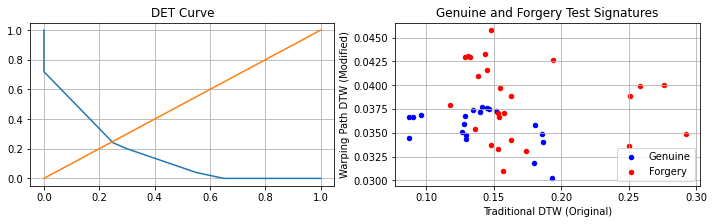

In [ ]:
dtw_gen = dtw_genuine(10)
dtw_forg = dtw_forgery(10)
gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
print("EER:",round(get_eer(forg,gen),4))
visualise_scatter(forg,gen,dtw_gen,dtw_forg)

In [ ]:
EER = []
for i in tqdm(range(11,21)):
  dtw_gen = dtw_genuine(i)
  dtw_forg = dtw_forgery(i)
  gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
  EER.append(round(get_eer(forg,gen),4))
print(EER)

  0%|          | 0/10 [00:00<?, ?it/s]

[0.0651, 0.1077, 0.0, 0.2333, 0.2897, 0.1143, 0.1371, 0.2348, 0.0444, 0.0737]


In [ ]:
EER = []
for i in tqdm(range(21,26)):
  dtw_gen = dtw_genuine(i)
  dtw_forg = dtw_forgery(i)
  gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
  EER.append(round(get_eer(forg,gen),4))
print(EER)

  0%|          | 0/5 [00:00<?, ?it/s]

[0.0308, 0.0, 0.0714, 0.0222, 0.2353]


In [ ]:
EER = []
for i in tqdm(range(26,31)):
  dtw_gen = dtw_genuine(i)
  dtw_forg = dtw_forgery(i)
  gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
  EER.append(round(get_eer(forg,gen),4))
print(EER)

  0%|          | 0/5 [00:00<?, ?it/s]

[0.16, 0.1111, 0.2154, 0.1556, 0.1391]


In [ ]:
EER = []
for i in tqdm(range(31,36)):
  dtw_gen = dtw_genuine(i)
  dtw_forg = dtw_forgery(i)
  gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
  EER.append(round(get_eer(forg,gen),4))
print(EER)

  0%|          | 0/5 [00:00<?, ?it/s]

[0.0941, 0.0714, 0.2125, 0.1333, 0.1314]


In [ ]:
EER = []
for i in tqdm(range(36,41)):
  dtw_gen = dtw_genuine(i)
  dtw_forg = dtw_forgery(i)
  gen,forg = np.average(dtw_gen, axis=1, weights=[1./5, 4./5]),np.average(dtw_forg, axis=1, weights=[1./5, 4./5])
  EER.append(round(get_eer(forg,gen),4))
print(EER)

  0%|          | 0/5 [00:00<?, ?it/s]

[0.1407, 0.0222, 0.1364, 0.14, 0.2]


The average value of EER for 40 signatures from MCYT database is coming out approximately as 13%